In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_excel('S1.xlsx')
df2 = pd.read_excel('E1.xlsx')
df3 = pd.read_excel('Z1.xlsx')
df2.to_excel('E1.xlsx', index=False)
df1

,Id-Parti,Id-Zone,NomEquipment,DateEntrer,NombreEquipment,VolumeEquipment,VolumZone,VolumeParti,VolumeTotal,ResteZone,ResteParti
0,1,1,Canon 30,2025-07-06,10,0.10,9.38,33.5,1.000,6.500,32.500
1,1,1,HP,2025-07-02,10,0.13,9.38,33.5,1.250,6.250,32.250
2,1,1,HP,2025-07-03,30,0.13,9.38,33.5,3.750,3.750,29.750
3,1,1,pc-dell,2025-07-04,15,0.13,9.38,33.5,1.875,5.625,31.625
4,1,2,enduleur datacenter,2025-07-04,15,0.30,7.50,33.5,4.500,3.000,29.000
5,1,2,pc-dell,2025-07-01,9,0.13,7.50,33.5,1.125,6.375,32.375
6,1,2,TV,2025-07-05,5,0.23,7.50,33.5,1.125,6.375,32.375
7,1,3,enduleur datacenter,2025-07-04,8,0.30,7.50,33.5,2.400,5.100,31.100
8,1,4,HP,2025-07-07,20,0.13,6.00,33.5,2.500,3.500,31.000
9,1,5,Canon 30,2025-07-05,10,0.10,5.00,33.5,1.000,4.000,32.500


In [7]:
df1 = df1.rename(columns={ 'Expr1': 'VolumeTotal', 'Expr2': 'ResteZone','Expr3':'ResteParti'})
nouvelle_valeur = 9.38
df1.loc[df1['Id-Zone'] == 1, 'VolumZone'] = nouvelle_valeur
df1.to_excel('S1.xlsx', index=False)
partiel_df = df1[df1['Id-Parti'] == 1]
partiel_df

,Id-Parti,Id-Zone,NomEquipment,DateEntrer,NombreEquipment,VolumeEquipment,VolumZone,VolumeParti,VolumeTotal,ResteZone,ResteParti
0,1,1,Canon 30,2025-07-06,10,0.10,9.38,33.5,1.000,6.500,32.500
1,1,1,HP,2025-07-02,10,0.13,9.38,33.5,1.250,6.250,32.250
2,1,1,HP,2025-07-03,30,0.13,9.38,33.5,3.750,3.750,29.750
3,1,1,pc-dell,2025-07-04,15,0.13,9.38,33.5,1.875,5.625,31.625
4,1,2,enduleur datacenter,2025-07-04,15,0.30,7.50,33.5,4.500,3.000,29.000
5,1,2,pc-dell,2025-07-01,9,0.13,7.50,33.5,1.125,6.375,32.375
6,1,2,TV,2025-07-05,5,0.23,7.50,33.5,1.125,6.375,32.375
7,1,3,enduleur datacenter,2025-07-04,8,0.30,7.50,33.5,2.400,5.100,31.100
8,1,4,HP,2025-07-07,20,0.13,6.00,33.5,2.500,3.500,31.000
9,1,5,Canon 30,2025-07-05,10,0.10,5.00,33.5,1.000,4.000,32.500


In [8]:
sum_by_zone = partiel_df.groupby('Id-Zone')['VolumeTotal'].sum().reset_index()
sum_by_zone

,Id-Zone,VolumeTotal
0,1,7.875
1,2,6.750
2,3,2.400
3,4,2.500
4,5,3.950


In [9]:
volume_zone = partiel_df.drop_duplicates('Id-Zone')[['Id-Zone', 'VolumZone']]
resultat = pd.merge(sum_by_zone, volume_zone, on='Id-Zone')
resultat

,Id-Zone,VolumeTotal,VolumZone
0,1,7.875,9.38
1,2,6.750,7.50
2,3,2.400,7.50
3,4,2.500,6.00
4,5,3.950,5.00


In [10]:
resultat['Difference'] = resultat['VolumZone'] - resultat['VolumeTotal']
resultat


,Id-Zone,VolumeTotal,VolumZone,Difference
0,1,7.875,9.38,1.505
1,2,6.750,7.50,0.750
2,3,2.400,7.50,5.100
3,4,2.500,6.00,3.500
4,5,3.950,5.00,1.050


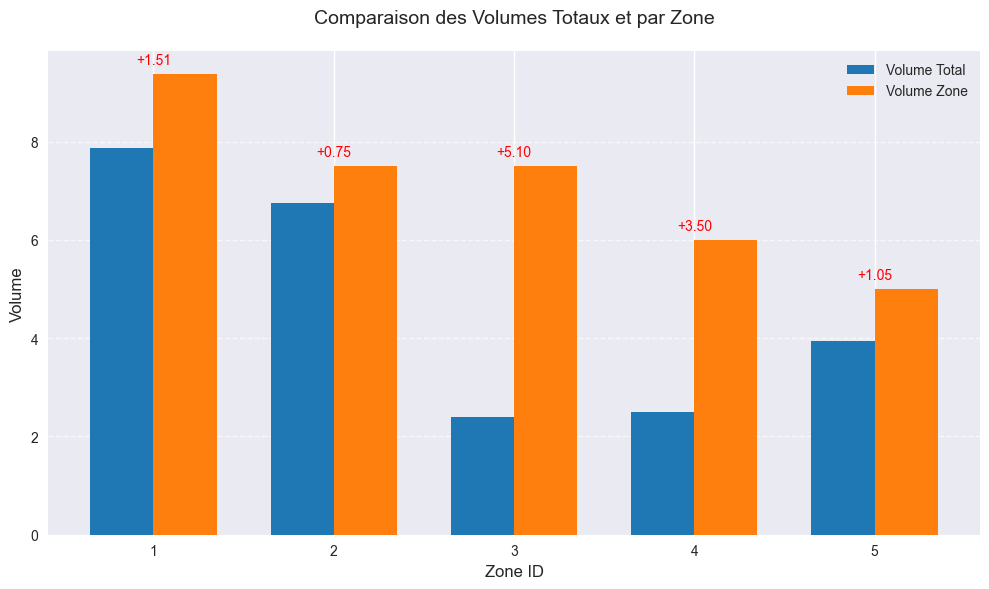

In [11]:
import numpy as np


plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
zones = resultat['Id-Zone']
volume_total = resultat['VolumeTotal']
volume_zone = resultat['VolumZone']
difference = resultat['Difference']
bar_widh = 0.35
index = np.arange(len(zones))
plt.bar(index, volume_total, bar_widh, label='Volume Total',color= '#1f77b4')
plt.bar(index + bar_widh, volume_zone, bar_widh, label='Volume Zone', color= '#ff7f0e')
for i, diff in enumerate(difference):
	plt.text(i + bar_widh/2, max(volume_total[i], volume_zone[i]) + 0.2, f'+{diff:.2f}' if diff > 0 else f'{diff:.2f}', ha='center', color='red')
plt.xlabel('Zone ID', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.title('Comparaison des Volumes Totaux et par Zone', fontsize=14, pad=20)
plt.xticks(index + bar_widh/2, zones)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
resultats = df1.copy()
resultats['PourcentageZone'] = (resultats['VolumeTotal'] / resultats['VolumZone']) * 100
resultats[['Id-Zone', 'NomEquipment', 'VolumeTotal', 'VolumZone', 'PourcentageZone']]

,Id-Zone,NomEquipment,VolumeTotal,VolumZone,PourcentageZone
0,1,Canon 30,1.000,9.38,10.660981
1,1,HP,1.250,9.38,13.326226
2,1,HP,3.750,9.38,39.978678
3,1,pc-dell,1.875,9.38,19.989339
4,2,enduleur datacenter,4.500,7.50,60.000000
5,2,pc-dell,1.125,7.50,15.000000
6,2,TV,1.125,7.50,15.000000
7,3,enduleur datacenter,2.400,7.50,32.000000
8,4,HP,2.500,6.00,41.666667
9,5,Canon 30,1.000,5.00,20.000000


<function matplotlib.pyplot.show(close=None, block=None)>

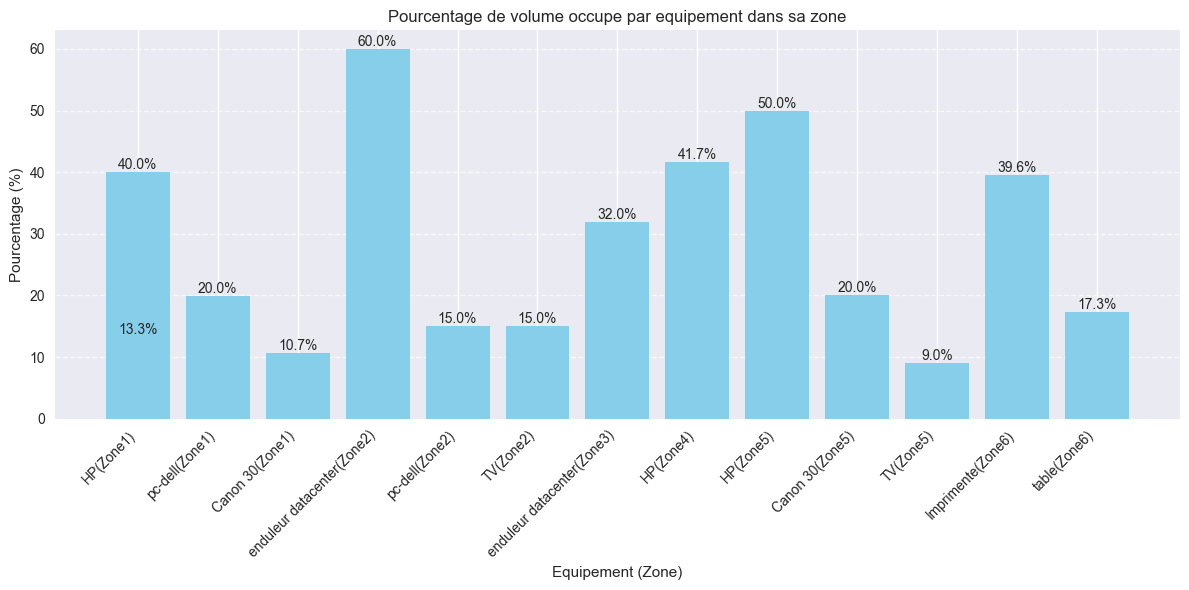

In [13]:
resultats_sorted = resultats.sort_values(['Id-Zone', 'PourcentageZone'], ascending=[True, False])
plt.figure(figsize=(12, 6))
bars = plt.bar(resultats_sorted['NomEquipment'] + "(Zone" + resultats_sorted['Id-Zone'].astype(str) + ")", resultats_sorted['PourcentageZone'], color='skyblue')
for bar in bars:
	height = bar.get_height()
	plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%', ha='center', va='bottom')
plt.title('Pourcentage de volume occupe par equipement dans sa zone')
plt.xlabel('Equipement (Zone)')
plt.ylabel('Pourcentage (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show 

In [14]:
differences = resultat[['Id-Zone', 'Difference']]
resultats_complet = pd.merge(resultats, differences, on='Id-Zone', how='left')
resultats_complet[['Id-Zone', 'NomEquipment', 'VolumeTotal', 'VolumZone', 'PourcentageZone', 'Difference']]


,Id-Zone,NomEquipment,VolumeTotal,VolumZone,PourcentageZone,Difference
0,1,Canon 30,1.000,9.38,10.660981,1.505
1,1,HP,1.250,9.38,13.326226,1.505
2,1,HP,3.750,9.38,39.978678,1.505
3,1,pc-dell,1.875,9.38,19.989339,1.505
4,2,enduleur datacenter,4.500,7.50,60.000000,0.750
5,2,pc-dell,1.125,7.50,15.000000,0.750
6,2,TV,1.125,7.50,15.000000,0.750
7,3,enduleur datacenter,2.400,7.50,32.000000,5.100
8,4,HP,2.500,6.00,41.666667,3.500
9,5,Canon 30,1.000,5.00,20.000000,1.050


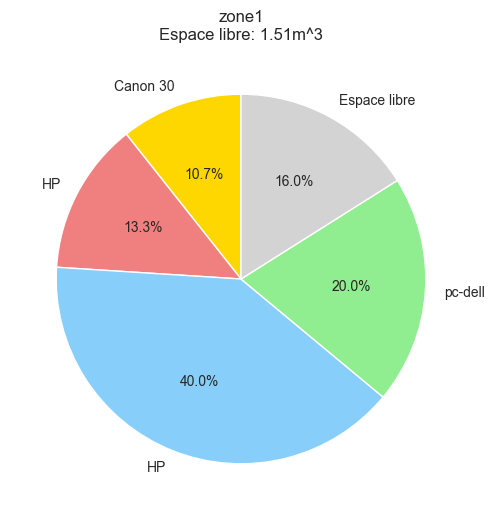

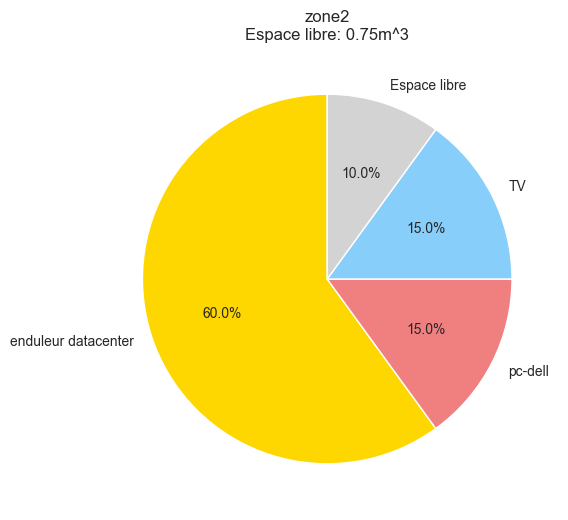

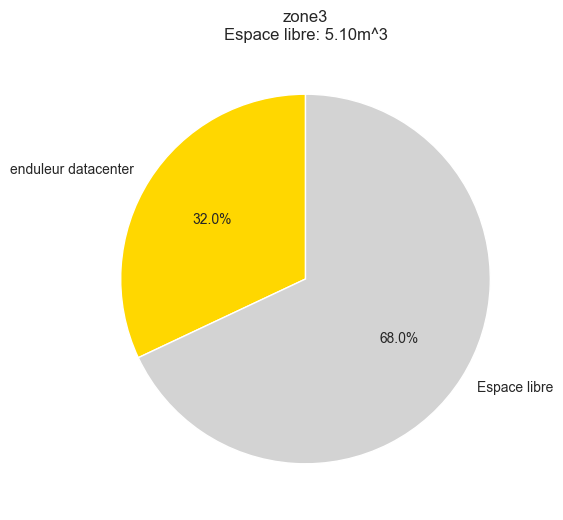

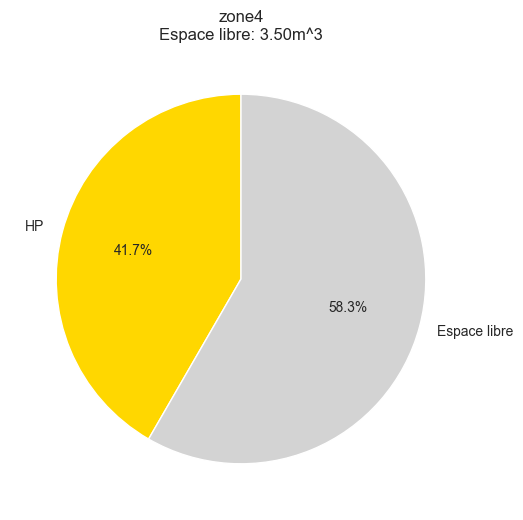

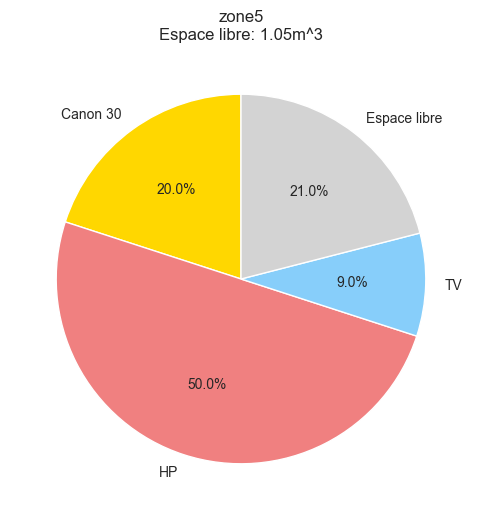

Aucune donnee valide pour la zone 6


In [15]:
couleurs_equipements = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'violet', 'orange']
for zone in resultats_complet['Id-Zone'].unique():
	zone_data = resultats_complet[resultats_complet['Id-Zone'] == zone].dropna(subset=['Difference'])
	if zone_data.empty:
		print(f"Aucune donnee valide pour la zone {zone}")
		continue
	volume_zone = zone_data['VolumZone'].iloc[0]
	espace_libre_pct = (zone_data['Difference'].iloc[0] / volume_zone) * 100
	data = list(zone_data['PourcentageZone']) + [espace_libre_pct]
	labels = list(zone_data['NomEquipment']) + ['Espace libre']
	colors = couleurs_equipements[:len(zone_data)] + ['lightgray']
	plt.figure(figsize=(8, 6))
	plt.pie(
		data,
		labels=labels,
		autopct='%1.1f%%',
		startangle=90,
		colors=colors,
		wedgeprops={'edgecolor': 'white', 'linewidth':1}
	)
	plt.title(f"zone{zone}\nEspace libre: {zone_data['Difference'].iloc[0]:.2f}m^3")
	plt.show()

In [16]:
sum_by_parti = df1.groupby('Id-Parti').agg({
	'VolumeTotal': 'sum',
	'VolumeParti': 'first'
}).reset_index()
sum_by_parti

,Id-Parti,VolumeTotal,VolumeParti
0,1,23.475,33.5
1,2,21.330,37.5


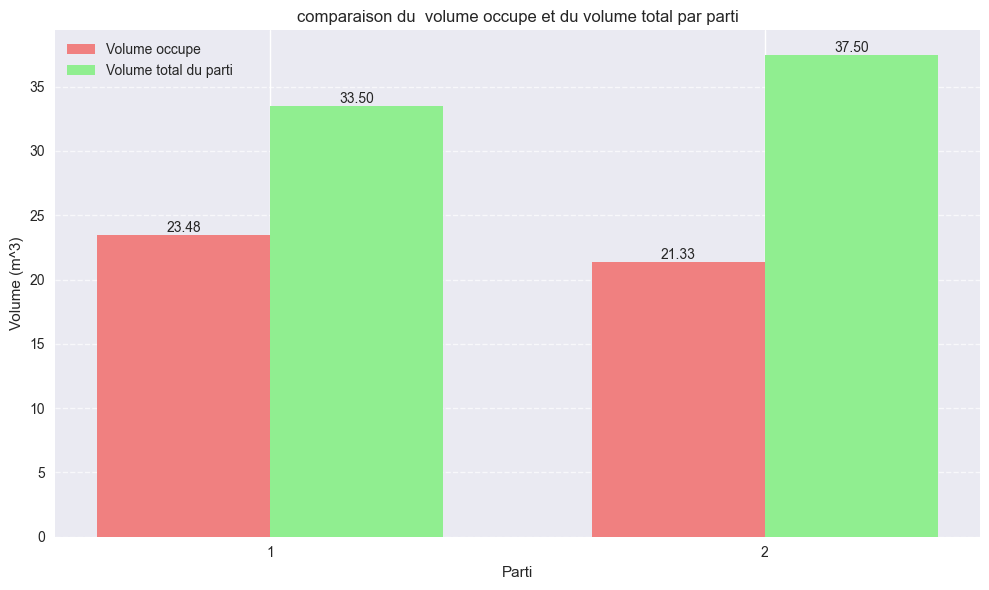

In [19]:
import matplotlib.pyplot as plt
import numpy as np
partis = sum_by_parti['Id-Parti'].astype(str)
volume_total = sum_by_parti['VolumeTotal']
volume_parti = sum_by_parti['VolumeParti']
espace_libre = volume_parti - volume_total
bar_widh = 0.35
index = np.arange(len(partis))
plt.figure(figsize=(10, 6))
bars1 = plt.bar(index, volume_total, bar_widh, color='lightcoral', label='Volume occupe')
bars2 = plt.bar(index + bar_widh, volume_parti, bar_widh, color='lightgreen', label='Volume total du parti')
def add_labels(bars):
	for bar in bars:
		height = bar.get_height()
		plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')
add_labels(bars1)
add_labels(bars2)
plt.xlabel('Parti')
plt.ylabel('Volume (m^3)')
plt.title('comparaison du  volume occupe et du volume total par parti')
plt.xticks(index+ bar_widh/2, partis)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

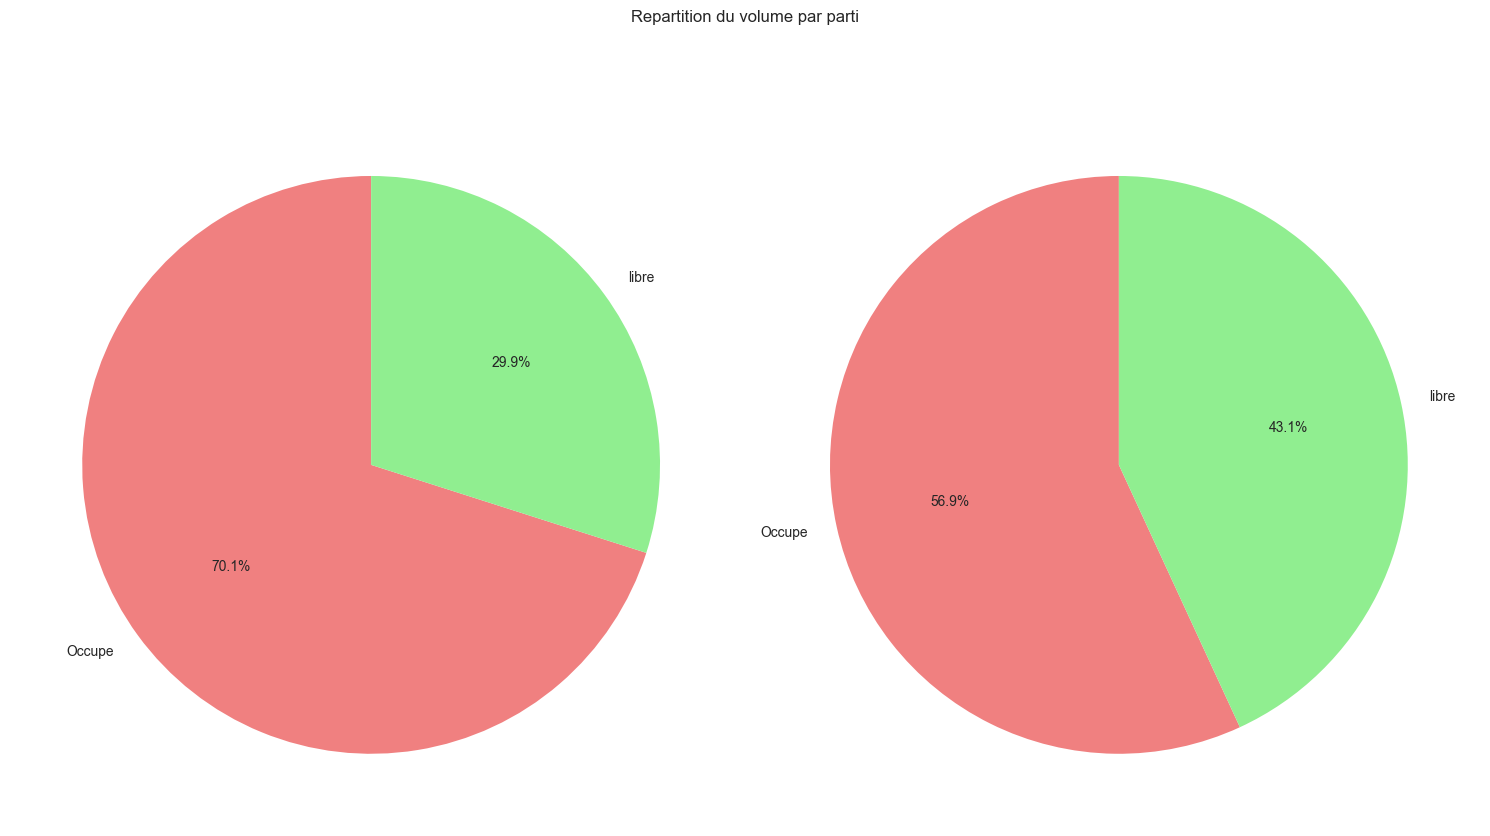

In [20]:
plt.figure(figsize=(15, 8))
for i, (_, row) in enumerate(sum_by_parti.iterrows()):
	parti_id = row['Id-Parti']
	sizes = [row['VolumeTotal'], row['VolumeParti'] - row['VolumeTotal']]
	plt.subplot(1, len(sum_by_parti), i+1)
	plt.pie(
		sizes,
		labels=['Occupe', 'libre'],
		colors=['lightcoral', 'lightgreen'],
		autopct='%1.1f%%',
		startangle=90
	)
plt.suptitle('Repartition du volume par parti', y=1.05)
plt.tight_layout()
plt.show